##### **load pickle data**

In [1]:
# read pickle data
import pickle

trainX = pickle.loads(open("C:/Users/AbsSayem/.vscode/computer_vision/dataset/HARDataset1/trainX.pickle", "rb").read())
trainY = pickle.loads(open("C:/Users/AbsSayem/.vscode/computer_vision/dataset/HARDataset1/trainY.pickle", "rb").read())
testX  = pickle.loads(open("C:/Users/AbsSayem/.vscode/computer_vision/dataset/HARDataset1/testX.pickle", "rb").read())
testY  = pickle.loads(open("C:/Users/AbsSayem/.vscode/computer_vision/dataset/HARDataset1/testY.pickle", "rb").read())

In [37]:
CATEGORIES = ["Boxing", "HandClapping", "HandWaving", "Jogging", "Running", "Standing", "Walking"]
print(CATEGORIES[trainY[0]])

HandClapping


**show images**

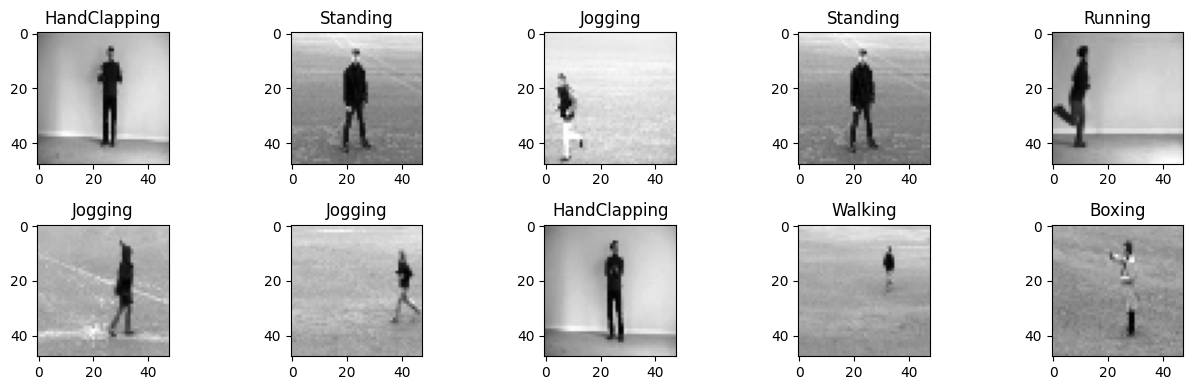

In [38]:
# read images from pickle data
import matplotlib.pyplot as plt
# show a single image
#plt.imshow(trainX[0], cmap='gray')

# show multiple images
CATEGORIES = ["Boxing", "HandClapping", "HandWaving", "Jogging", "Running", "Standing", "Walking"]
num_images = 10
# grid for subplots
rows, cols = 2, 5
# make a grid
fig, axes = plt.subplots(rows, cols, figsize=(13,4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# read and place images in the plot
for i in range(min(num_images, rows * cols)):
    axes[i].imshow(trainX[i], cmap='gray')  # Use 'cmap=None' for color images
    axes[i].set_title(f'{CATEGORIES[trainY[i]]}')
    #axes[i].axis('off')  # Optional: Turn off axis labels
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [45]:
# access the frames
for iter in range(len(trainX)):    # len(trainX)=45952
    # when iter==0: it gets the array of image 0
    pass    

`here we are able to access the frames. we will return back here after extracting foreground(human_shape) and getting the gait data`

**foreground extraction**
* to segment and seperate foreground we will use OpenCV and GrabCut.
* how the GrabCut algorithm works?- by repetating the following steps-
    1. Estimate the color distribution of the foreground and background via a Gaussian Mixture Model (GMM)
    2. Construct a Markov random field over the pixels labels (i.e., foreground vs. background)
    3. Apply a graph cut optimization to arrive at the final segmentation
* OpenCV has an implementation of GrabCut via the `cv2.grabCut` function

**opencv grabcut: foreground segmentation and extraction - let's learn about opencv grabcut function:**
* `grabCut(img, mask, rect, bgdModel, fgdModel, iterCount[, model]) -> mask, bgdModel, fgdModel`
* `input arguments`:
    * `img`: the input image, (unsigned 8-bit integer in BGR (3) channel ordering)
    * `mask`: the input/output mask (a single-channel unsigned 8-bit integer).
        * `cv2.GC_INIT_WITH_RECT`: the bounding box initialization, mask is initiated automatically
        * `cv2.GC_INIT_WITH_MASK`: the mask initialization
    * `rect`: the bounding box rectangle that contains the region that we want to segment, only used when we set the `mode` to `cv2.GC_INIT_WITH_MASK`
    * `bgModel`: temporary array used by GrabCut internally when modeling the background (no need external manipulation)
    * `fgModel`: temporary array used by GrabCut internally when modeling the foreground (no need external manipulation)
    * `mode`: either `cv2.GC_INIT_WITH_RECT` or `cv2.GC_INIT_WITH_MASK`, depends on what I am initializing
* `output arguments`:
    * `mask`: the output mask after applying GrabCut
    * `bgModel`: the temporary array used to model background (ignorable)
    * `fgModel`: the temporary array used to model foreground (ignorable)

**implement grabcut initializer (bounding_box vs mask)**

`bounding box`
* specify the bounding box is then used by the grabcut function to segment the foreground
* bounding box can be generated by -
    * manually labelling the (x,y)-coordinates of the bounding box
    * applying a `Haar Cascade` algorithm
    * using `HOG` + `Linear SVM` to detect the object
    * using dl-based object detector, like- `Faster R-CNN`, `SSDs`, `YOLO` etc

In [ ]:
# bounding box 
def bounding_box():
    pass

`masks`
* using mask, we can supply the approximate segmentation of the object in the image. grabcut can then iteratively apply graph cuts to improve the segmentation and extract the foreground from the image.
* the masks could be generated by -
    * manually creating in photo editing software, like- `photoshop`
    * applying ip operations, like- `thresholding`, `edge-detection`, `contour filtering`
    * utilizing dl-based segmentation nets, like- `Mask R-CNN`, `U-NET`

In [ ]:
# masks 
def masks():
    pass